# Workshop 10-1 Collaborative Notebook - Crime Data

1.   List item
2.   List item


-----
Hello everyone! This is a shared Jupyter notebook (think google docs) that we can all use to import, clean, and transform our dataset. It can be a little glitchy, but it runs the best on Chrome, if you have it. It's still the best option for shared work by far!

-----

In this notebook, we will be applying the strategies we learned about in the last session. You will find last week's [slides](https://docs.google.com/presentation/d/1G9f9qymSfLNvBV2wzqP1yQ0aJ2rqMkdXDAHiaA7G_0E/edit?usp=sharing) helpful, and the shorter [summary slides](https://docs.google.com/presentation/d/1QuraLUM_NErFu6RKH_IGBcprvIXwZQg9W10h-9beuKs/edit?usp=sharing). We will read in our data + needed packagegs, take a second to familiarize ourselves with the data, investigate questions we are interested in, and then preform some data cleaning/manipulation (depending on the questions we ask). **This is the first step in our project, so take your time with it & ask questions, as everything else will build off of this!**

Some tips:
- Make sure you document (either in a mardown cell or as a code comment) what you find and/or your reasoning for doing something. There are a lot of people working together, so the more you comment, the better it is for everyone! Communicating via documentation is a vital part of any group data science project. It could be as easy as "#lots of missing values for this column" or "Found average rates for this district is higher than the others. Should we invesetigate more?"
- Try not to work in the same cell as another people, Collab does not update fast enough. When in doubt, create another cell.
- If you are preforming data transformation (getting rid of rows, changing columns), do so in a copy of the dataset first and then apply it once we're certain that's what we want.
  - Generally doesn't hurt to work with copies, you can always apply it to the master df later.

**We will divide and conquer different parts of the notebook, so if you want to do a certain section, put your name on it. Then, you can work on it in your own notebook and then put your findings here!**


## Read in data
Import needed packages


In [ ]:
# Import needed packages

In [ ]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import folium
from folium import plugins
from google.colab import drive
drive.mount('/content/drive')
#add as needed

Mounted at /content/drive


In [ ]:
# Read-in dataset
crime_df = pd.read_csv("drive/My Drive/HPD_Crime_2009_2017_v01.csv")
crime_df.head()

,Location_Desc,Police_Beat,Street_Type,RecordID,Date_Reported,Offense_Type,Block_Range,Street_Prefix,Street_Name,Num_Offenses,...,X,Y,GEOID10,GEOID00,Police_Division,CTA_ID,CTA_Name,Geocoded,Location_Code,Hour
0,NaN,14D40,RD,1,NaN,Burglary,5600-5699,NaN,SELINSKY,1,...,-95.333268,29.637514,4.820133e+14,4.820133e+14,Southeast Division,K066,Minnetex,1,NaN,8
1,NaN,7C20,NaN,2,NaN,Theft,3900-3999,NaN,CAVALCADE,1,...,-95.331799,29.800081,4.820121e+14,4.820121e+14,Northeast Division,K004,Kashmere Gardens,1,NaN,11
2,NaN,13D40,PKWY,3,NaN,Theft,8500-8599,S,SAM HOUSTON,1,...,-95.516291,29.625560,4.820133e+14,4.820133e+14,Southwest Division,K070,Five Corners,1,NaN,15
3,NaN,18F40,RD,4,NaN,Robbery,2700-2799,NaN,DUNVALE,1,...,-95.514200,29.736820,4.820143e+14,4.820143e+14,Midwest Division,K080,Mid-West,1,NaN,14
4,RESTAURANT/CAFETERIA,24C60,PKWY,5,09/08/1914,Burglary,12700-12799,W,LAKE HOUSTON,1,...,-95.195466,29.924672,4.820125e+14,4.820125e+14,Kingwood Division,K106,Lake Houston,1,210,7


## Understanding the Data
Investigate:
- shape (how many observations and fields there are)
- data types (are the categorical, datetime, numeric, one-hot encoded?)
- missing data (which columns have the most missingness?)
- unique values (what columns have the most unique values?)

Take note of: *(write down for future reference, not to do in this section)*
- any columns datatypes you might want to change (i.e. one-hot-encoding a categorical field)
- any new columns you might want to make


In [ ]:
print(crime_df.shape)

(1094207, 23)


In [ ]:
print(crime_df.dtypes)

Location_Desc       object
Police_Beat         object
Street_Type         object
RecordID             int64
Date_Reported       object
Offense_Type        object
Block_Range         object
Street_Prefix       object
Street_Name         object
Num_Offenses         int64
Srce_YYMM           object
NGC                float64
Match_addr          object
X                  float64
Y                  float64
GEOID10            float64
GEOID00            float64
Police_Division     object
CTA_ID              object
CTA_Name            object
Geocoded             int64
Location_Code       object
Hour                 int64
dtype: object


In [ ]:
# The most NaN values come from the Street Type, Street Prefix, and NGC columns.
print(crime_df.isna().sum())

Location_Desc       35944
Police_Beat          3308
Street_Type        261785
RecordID                0
Date_Reported           4
Offense_Type            0
Block_Range           157
Street_Prefix      943785
Street_Name             2
Num_Offenses            0
Srce_YYMM               0
NGC                851787
Match_addr          30947
X                   13524
Y                   13524
GEOID10             30947
GEOID00             30947
Police_Division     42448
CTA_ID              44218
CTA_Name            44218
Geocoded                0
Location_Code       36007
Hour                    0
dtype: int64


In [ ]:
print(crime_df.nunique())

Location_Desc          132
Police_Beat            126
Street_Type             33
RecordID           1094207
Date_Reported         4220
Offense_Type             8
Block_Range            350
Street_Prefix            4
Street_Name          24816
Num_Offenses            17
Srce_YYMM              103
NGC                      2
Match_addr           58527
X                    82624
Y                    53225
GEOID10              25116
GEOID00              20790
Police_Division         16
CTA_ID                 129
CTA_Name               150
Geocoded                 2
Location_Code          126
Hour                    25
dtype: int64


Notes:

## Investigation
What are interesting questions that can be asked & answered with this data?
What might we want to focus on going forward?

In this section, we will use statistical summary operations (mean, median, count, standard devation, groupbys) to answer intital questions we have.

In [ ]:
df_missing_res_addr = crime_df[crime_df["Match_addr"].isna()]
all_streets = df_missing_res_addr.groupby('Street_Name')['Street_Name'].nunique()
all_streets
#Nan is not correlated with zipcode or location since out of those missing "res_addr", there were 7500 unique street names

Street_Name
.5 ELYSIAN                   1
0.5                          1
0000000000                   1
08201 BELLFORT ST W 1303`    1
0VERCROSS                    1
                            ..
ZAVALLA ST                   1
ZIRCON                       1
ZOLTOWSKI EXIT               1
ZUBIN LANE                   1
ZULA                         1
Name: Street_Name, Length: 7506, dtype: int64

Notes:

## Data Cleaning

Identifying missing values requires **context** and **intuition**:

- Context often comes in the form of *documentation*
- Intuition often comes in the form of common sense

Two (three) options: elimination or imputation (or leaving it alone if it's not vital)

In [ ]:
# Dropping Street Type, Street Prefix, and NGC columns. These columns have the
# most NaN values and will be unnecessary to our findings.

crime_df.drop(columns=['Street_Type', 'Street_Prefix', 'NGC'], inplace = True)
print(crime_df.shape)
crime_df.head()

(1094207, 20)


,Location_Desc,Police_Beat,RecordID,Date_Reported,Offense_Type,Block_Range,Street_Name,Num_Offenses,Srce_YYMM,Match_addr,X,Y,GEOID10,GEOID00,Police_Division,CTA_ID,CTA_Name,Geocoded,Location_Code,Hour
0,NaN,14D40,1,NaN,Burglary,5600-5699,SELINSKY,1,2014_06,"5650 Selinsky Rd, Houston, Texas, 77048",-95.333268,29.637514,4.820133e+14,4.820133e+14,Southeast Division,K066,Minnetex,1,NaN,8
1,NaN,7C20,2,NaN,Theft,3900-3999,CAVALCADE,1,2014_06,"3950 Cavalcade St, Houston, Texas, 77026",-95.331799,29.800081,4.820121e+14,4.820121e+14,Northeast Division,K004,Kashmere Gardens,1,NaN,11
2,NaN,13D40,3,NaN,Theft,8500-8599,SAM HOUSTON,1,2014_07,"8550 S Sam Houston Pkwy W, Houston, Texas, 7708",-95.516291,29.625560,4.820133e+14,4.820133e+14,Southwest Division,K070,Five Corners,1,NaN,15
3,NaN,18F40,4,NaN,Robbery,2700-2799,DUNVALE,1,2014_07,"2750 Dunvale Rd, Houston, Texas, 77063",-95.514200,29.736820,4.820143e+14,4.820143e+14,Midwest Division,K080,Mid-West,1,NaN,14
4,RESTAURANT/CAFETERIA,24C60,5,09/08/1914,Burglary,12700-12799,LAKE HOUSTON,1,2014_09,"12750 W Lake Houston Pkwy, Houston, Texas, 7704",-95.195466,29.924672,4.820125e+14,4.820125e+14,Kingwood Division,K106,Lake Houston,1,210,7


In [ ]:
crime_df["Year"] = crime_df["Srce_YYMM"].str[:4]
crime_df["Year"].unique()

array(['2014', '2015', '2010', '2013', '2009', '2011', '2012', '2016',
       '2017'], dtype=object)

In [ ]:
elections = pd.read_csv("https://raw.githubusercontent.com/LouZhou1/elections/main/Elections.csv")
elections["Year"] = elections["Year"].astype(str)

In [ ]:
crime_df = crime_df.merge(elections, left_on = "Year", right_on = "Year")
crime_df

,Location_Desc,Police_Beat,RecordID,Date_Reported,Offense_Type,Block_Range,Street_Name,Num_Offenses,Srce_YYMM,Match_addr,...,CTA_ID,CTA_Name,Geocoded,Location_Code,Hour,Year,Presidential_Election,Congress_Election,State_Election,Local_Election
0,NaN,14D40,1,NaN,Burglary,5600-5699,SELINSKY,1,2014_06,"5650 Selinsky Rd, Houston, Texas, 77048",...,K066,Minnetex,1,NaN,8,2014,0,1,1,1
1,NaN,7C20,2,NaN,Theft,3900-3999,CAVALCADE,1,2014_06,"3950 Cavalcade St, Houston, Texas, 77026",...,K004,Kashmere Gardens,1,NaN,11,2014,0,1,1,1
2,NaN,13D40,3,NaN,Theft,8500-8599,SAM HOUSTON,1,2014_07,"8550 S Sam Houston Pkwy W, Houston, Texas, 7708",...,K070,Five Corners,1,NaN,15,2014,0,1,1,1
3,NaN,18F40,4,NaN,Robbery,2700-2799,DUNVALE,1,2014_07,"2750 Dunvale Rd, Houston, Texas, 77063",...,K080,Mid-West,1,NaN,14,2014,0,1,1,1
4,RESTAURANT/CAFETERIA,24C60,5,09/08/1914,Burglary,12700-12799,LAKE HOUSTON,1,2014_09,"12750 W Lake Houston Pkwy, Houston, Texas, 7704",...,K106,Lake Houston,1,210,7,2014,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006325,MISC. BUSINESS (NON-SPECIFIC),9C40,1094203,12/31/2017,Burglary,12700-12799,EAST,1,2017_12,"12750 East Fwy, Houston, Texas, 77015",...,K054,Northshore,1,05Z,0,2017,0,0,1,1
1006326,APARTMENT PARKING LOT,9C40,1094204,12/31/2017,Theft,600-699,MAXEY RD,1,2017_12,"650 Maxey Rd, Houston, Texas, 77013",...,K054,Northshore,1,18A,14,2017,0,0,1,1
1006327,SERVICE/GAS STATION,9C40,1094205,12/31/2017,Theft,7600-7699,EAST,1,2017_12,"7650 East Fwy, Houston, Texas, 77020",...,K005,Denver Harbor / Port Houston,1,23S,14,2017,0,0,1,1
1006328,"ELECTRONICS STORE, ELECTRICAL SUP.",9C40,1094206,12/31/2017,Robbery,1000-1099,FEDERAL,1,2017_12,"1050 Federal Rd, Houston, Texas, 77015",...,K054,Northshore,1,24E,17,2017,0,0,1,1


Notes:

## Data Transformation

Depending on the questions we want to answer, some data fields may need to be changed.

- Encoding
- Standardization

In [ ]:
crime_df.columns

Index(['Location_Desc', 'Police_Beat', 'RecordID', 'Date_Reported',
       'Offense_Type', 'Block_Range', 'Street_Name', 'Num_Offenses',
       'Srce_YYMM', 'Match_addr', 'X', 'Y', 'GEOID10', 'GEOID00',
       'Police_Division', 'CTA_ID', 'CTA_Name', 'Geocoded', 'Location_Code',
       'Hour', 'Year', 'Presidential_Election', 'Congress_Election',
       'State_Election', 'Local_Election'],
      dtype='object')

In [ ]:
yearly_data = []
crime_df_pres = crime_df[crime_df["Presidential_Election"] == 1]
crime_df_pres_yearly = len(crime_df_pres["Presidential_Election"]) / len(crime_df_pres["Year"].unique())
yearly_data.append(crime_df_pres_yearly)

In [ ]:
crime_df_Congress = crime_df[(crime_df["Congress_Election"] == 1) & (crime_df["Presidential_Election"] == 0)]
crime_df_congress_yearly = len(crime_df_Congress["Congress_Election"]) / len(crime_df_Congress["Year"].unique())
yearly_data.append(crime_df_congress_yearly)

In [ ]:
crime_df_State = crime_df[(crime_df["State_Election"] == 1) & (crime_df["Congress_Election"] == 0) & (crime_df["Presidential_Election"] == 0)]
crime_df_State_yearly = len(crime_df_State["State_Election"]) / len(crime_df_State["Year"].unique())
yearly_data.append(crime_df_State_yearly)

In [ ]:
yearly_data
columns = ["Presidential", "Congress","State"]

Notes:

<BarContainer object of 3 artists>

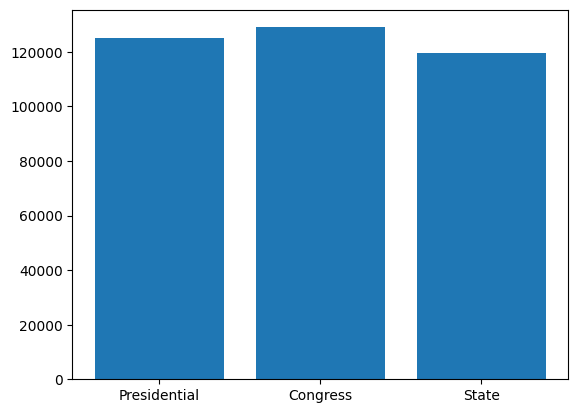

In [ ]:
plt.bar(columns, yearly_data)

In [ ]:
crime_df["Offense_Type"].unique()

array(['Burglary', 'Theft', 'Robbery', 'Auto Theft', 'Rape', 'Murder',
       'Aggravated Assault', '1'], dtype=object)

In [ ]:
crime_df.columns
crime_df_auto = crime_df
rice_coords = [29.7174, -95.4018]
crime_locations = crime_df_auto[["X","Y"]]
#crime_locations = crime_locations[(crime_locations["Y"] > 29.70) & (crime_locations["Y"] < 29.72)]
#crime_locations = crime_locations[(crime_locations["X"] > -95.41) & (crime_locations["X"] < -95.39)]
crime_locations = crime_locations.dropna()
crime_locations = crime_locations.sample(50000)
crime_locations['zipped'] = list(zip(crime_locations.Y, crime_locations.X))
crime_locations['zipped']

778605    (29.894474, -95.418579)
955522    (29.798281, -95.523122)
898789    (29.970776, -95.326303)
555824    (29.698819, -95.618146)
977083    (29.720734, -95.374782)
                   ...           
878017    (29.771601, -95.227845)
274238     (29.59439, -95.497674)
85398     (29.700472, -95.294125)
583844    (29.762553, -95.627105)
981837     (29.685034, -95.55143)
Name: zipped, Length: 50000, dtype: object

In [ ]:
crime_locations_new = crime_locations['zipped']
base_map = folium.Map(location=(29.7604, -95.3698), zoom_start = 10)
heatmap = plugins.HeatMap(crime_locations_new, radius = 5, blur = 2)
base_map.add_child(heatmap)

In [ ]:
crime_df_auto = crime_df[crime_df["Offense_Type"] == 'Aggravated Assault']
crime_locations = crime_df_auto[["X","Y"]]
#crime_locations = crime_locations[(crime_locations["Y"] > 29.70) & (crime_locations["Y"] < 29.72)]
#crime_locations = crime_locations[(crime_locations["X"] > -95.41) & (crime_locations["X"] < -95.39)]
crime_locations = crime_locations.dropna()

crime_locations = crime_locations.sample(10000)
crime_locations['zipped'] = list(zip(crime_locations.Y, crime_locations.X))
crime_locations['zipped']
crime_locations_new = crime_locations['zipped']
base_map = folium.Map(location=(29.7604, -95.3698), zoom_start = 10)
heatmap = plugins.HeatMap(crime_locations_new, radius = 5, blur = 2)
base_map.add_child(heatmap)

In [ ]:
crime_df_auto = crime_df[crime_df["Offense_Type"] == 'Theft']
crime_locations = crime_df_auto[["X","Y"]]
#crime_locations = crime_locations[(crime_locations["Y"] > 29.70) & (crime_locations["Y"] < 29.72)]
#crime_locations = crime_locations[(crime_locations["X"] > -95.41) & (crime_locations["X"] < -95.39)]
crime_locations = crime_locations.dropna()

crime_locations = crime_locations.sample(10000)
crime_locations['zipped'] = list(zip(crime_locations.Y, crime_locations.X))
crime_locations['zipped']
crime_locations_new = crime_locations['zipped']
base_map = folium.Map(location=(29.7604, -95.3698), zoom_start = 10)
heatmap = plugins.HeatMap(crime_locations_new, radius = 5, blur = 2)
base_map.add_child(heatmap)

In [ ]:
crime_df_auto = crime_df[crime_df["Offense_Type"] == 'Burglary']
crime_locations = crime_df_auto[["X","Y"]]
#crime_locations = crime_locations[(crime_locations["Y"] > 29.70) & (crime_locations["Y"] < 29.72)]
#crime_locations = crime_locations[(crime_locations["X"] > -95.41) & (crime_locations["X"] < -95.39)]
crime_locations = crime_locations.dropna()

crime_locations = crime_locations.sample(10000)
crime_locations['zipped'] = list(zip(crime_locations.Y, crime_locations.X))
crime_locations['zipped']
crime_locations_new = crime_locations['zipped']
base_map = folium.Map(location=(29.7604, -95.3698), zoom_start = 10)
heatmap = plugins.HeatMap(crime_locations_new, radius = 5, blur = 2)
base_map.add_child(heatmap)

In [ ]:
crime_df_auto = crime_df[crime_df["Offense_Type"] == 'Auto Theft']
crime_locations = crime_df_auto[["X","Y"]]
#crime_locations = crime_locations[(crime_locations["Y"] > 29.70) & (crime_locations["Y"] < 29.72)]
#crime_locations = crime_locations[(crime_locations["X"] > -95.41) & (crime_locations["X"] < -95.39)]
crime_locations = crime_locations.dropna()

crime_locations = crime_locations.sample(10000)
crime_locations['zipped'] = list(zip(crime_locations.Y, crime_locations.X))
crime_locations['zipped']
crime_locations_new = crime_locations['zipped']
base_map = folium.Map(location=(29.7604, -95.3698), zoom_start = 10)
heatmap = plugins.HeatMap(crime_locations_new, radius = 5, blur = 2)
base_map.add_child(heatmap)

In [ ]:
crime_df_auto = crime_df[crime_df["Offense_Type"] == 'Rape']
crime_locations = crime_df_auto[["X","Y"]]
#crime_locations = crime_locations[(crime_locations["Y"] > 29.70) & (crime_locations["Y"] < 29.72)]
#crime_locations = crime_locations[(crime_locations["X"] > -95.41) & (crime_locations["X"] < -95.39)]
crime_locations = crime_locations.dropna()

#crime_locations = crime_locations.sample(1000)
crime_locations['zipped'] = list(zip(crime_locations.Y, crime_locations.X))
crime_locations['zipped']
crime_locations_new = crime_locations['zipped']
base_map = folium.Map(location=(29.7604, -95.3698), zoom_start = 10)
heatmap = plugins.HeatMap(crime_locations_new, radius = 5, blur = 2)
base_map.add_child(heatmap)

In [ ]:
crime_df_auto = crime_df[crime_df["Offense_Type"] == 'Murder']
crime_locations = crime_df_auto[["X","Y"]]
#crime_locations = crime_locations[(crime_locations["Y"] > 29.70) & (crime_locations["Y"] < 29.72)]
#crime_locations = crime_locations[(crime_locations["X"] > -95.41) & (crime_locations["X"] < -95.39)]
crime_locations = crime_locations.dropna()

#crime_locations = crime_locations.sample(1000)
crime_locations['zipped'] = list(zip(crime_locations.Y, crime_locations.X))
crime_locations['zipped']
crime_locations_new = crime_locations['zipped']
base_map = folium.Map(location=(29.7604, -95.3698), zoom_start = 10)
heatmap = plugins.HeatMap(crime_locations_new, radius = 5, blur = 2)
base_map.add_child(heatmap)

In [ ]:
crime_df_auto = crime_df[(crime_df["Hour"] >= 6) & (crime_df["Hour"] <= 18)]
crime_locations = crime_df_auto[["X","Y"]]
#crime_locations = crime_locations[(crime_locations["Y"] > 29.70) & (crime_locations["Y"] < 29.72)]
#crime_locations = crime_locations[(crime_locations["X"] > -95.41) & (crime_locations["X"] < -95.39)]
crime_locations = crime_locations.dropna()

crime_locations = crime_locations.sample(5000)
crime_locations['zipped'] = list(zip(crime_locations.Y, crime_locations.X))
crime_locations['zipped']
crime_locations_new = crime_locations['zipped']
base_map = folium.Map(location=(29.7604, -95.3698), zoom_start = 10)
heatmap = plugins.HeatMap(crime_locations_new, radius = 5, blur = 2)
base_map.add_child(heatmap)

Text(0.5, 1.0, 'Theft')

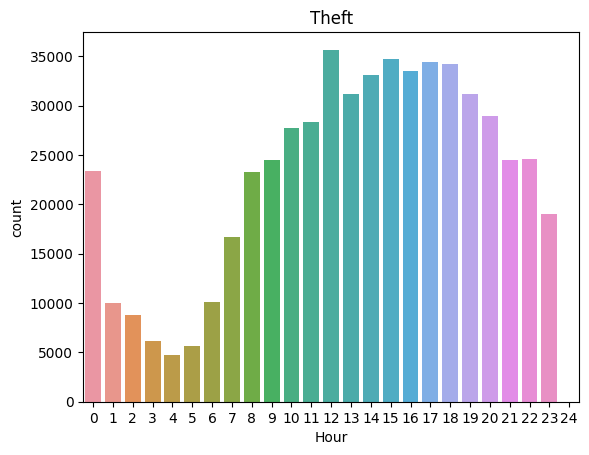

In [ ]:
import seaborn as sns
crime_df_theft = crime_df[crime_df["Offense_Type"] == "Theft"]
sns.countplot(crime_df_theft, x="Hour").set_title('Theft')

Text(0.5, 1.0, 'Robbery')

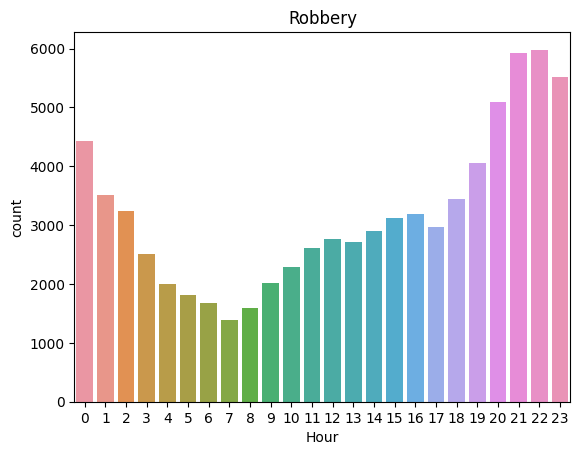

In [ ]:
crime_df_burglary = crime_df[crime_df["Offense_Type"] == "Robbery"]
sns.countplot(crime_df_burglary, x="Hour").set_title('Robbery')

Text(0.5, 1.0, 'Murder')

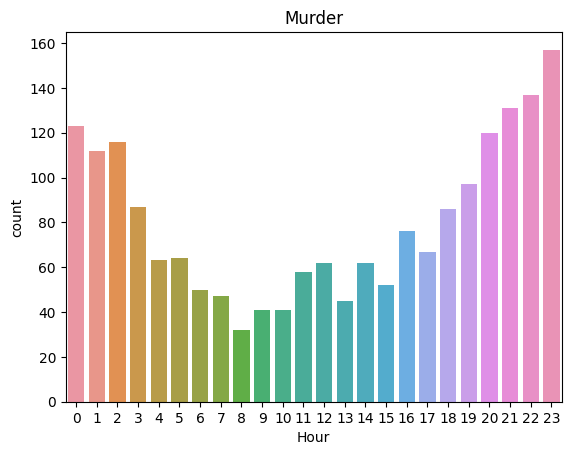

In [ ]:
crime_df_robbery = crime_df[crime_df["Offense_Type"] == "Murder"]
sns.countplot(crime_df_robbery, x="Hour").set_title('Murder')

# Modeling - Regression

To do:

- decide the variable we want to predict
- chose variables to use a predictors